In [2]:
from graph_tool.all import *
from numpy.random import randint
g=Graph()
g.add_vertex(100)
for s,t in zip(randint(0,100,100),randint(0,100,100)):
    g.add_edge(g.vertex(s), g.vertex(t))

vprop_double=g.new_vertex_property("double")
v=g.vertex(10)
vprop_double[v]=3.1416

vprop_vint=g.new_vertex_property("vector<int>")
v=g.vertex(40)
vprop_vint[v]=[1,3,42,54]

eprop_dict = g.new_edge_property("object")
e=g.edges().next()
eprop_dict[e] = {"foo":"bar","gnu":42}

gprop_bool=g.new_graph_property("bool")
gprop_bool[g]=True


In [4]:
from numpy.random import random
vprop_double.get_array()[:]= random(g.num_vertices())

vprop_double.a=random(g.num_vertices())
vprop_double.a

PropertyArray([0.27785533, 0.46751489, 0.97160363, 0.26460045, 0.95911779,
               0.90982158, 0.48265604, 0.51392922, 0.7113323 , 0.32983332,
               0.21666257, 0.82453303, 0.59821953, 0.09249378, 0.43446724,
               0.07244035, 0.51926218, 0.59677822, 0.14796691, 0.1327262 ,
               0.34119006, 0.98046476, 0.06001676, 0.08137249, 0.64340955,
               0.39042215, 0.00245706, 0.32258928, 0.15033395, 0.16800391,
               0.91303452, 0.89437229, 0.78850302, 0.84693925, 0.4968991 ,
               0.35806191, 0.79876297, 0.95117647, 0.05392068, 0.85271859,
               0.92508895, 0.85129706, 0.08464992, 0.25782721, 0.07522011,
               0.67712355, 0.39748343, 0.43418   , 0.99090895, 0.41345437,
               0.66946361, 0.31431946, 0.71011007, 0.85608736, 0.87187153,
               0.44541737, 0.17522173, 0.24423198, 0.87899926, 0.37857703,
               0.77525686, 0.99987686, 0.62791964, 0.96271338, 0.07326945,
               0.23045852

In [6]:
#Internal property maps

eprop = g.new_edge_property("string")
g.edge_properties["some name"]=eprop
g.list_properties()

some name      (edge)    (type: string)


In [7]:
gprop = g.new_graph_property("int")
g.graph_properties["foo"]=gprop
g.graph_properties["foo"]=42
print(g.graph_properties["foo"])

42


In [8]:
del g.graph_properties["foo"]

In [9]:
vprop = g.new_vertex_property("double")
g.vp.foo=vprop
g.vp.foo[v]=3.14
print(g.vp.foo[v])

3.14


In [12]:
#Graph I/O
#Graphs can be saved and loaded in four formats: graphml, dot, gml and a custom binary format gt (see The gt file format).

g = Graph()
g.save("my_graph.xml.gz")
#g2=load_graph("my_graph.xml.gx")

In [14]:
g2=load_graph("my_graph.xml.gz")

In [17]:
from __future__ import division , absolute_import, print_function
import sys
if sys.version_info < (3,):
    range=xrange

import os
from pylab import *
from numpy.random import *
seed(42)
from graph_tool.all import *
g=Graph()
v_age=g.new_vertex_property("int")
e_age=g.new_edge_property("int")

N=100000
v=g.add_vertex()
v_age[v]=0

vlist=[v]

for i in range(1,N):
    v=g.add_vertex()
    v_age[v]=i
    i = randint(0,len(vlist))
    target=vlist[i]
    e=g.add_edge(v,target)
    e_age[e]=i
    vlist.append(target)
    vlist.append(v)

v = g.vertex(randint(0,g.num_vertices()))

while True:
    print("vertex",int(v),"in_degree",v.in_degree(),"out_degree",
    v.out_degree(),"age",v_age[v])

    if v.out_degree()==0:
        print("Nowhere else to go... We found the main hub")
        break

    n_list=[]
    for w in v.out_neighbors():
        n_list.append(w)

    v = n_list[randint(0, len(n_list))]

g.vertex_properties["age"]=v_age
g.edge_properties["age"]=e_age




vertex 36063 in_degree 0 out_degree 1 age 36063
vertex 9075 in_degree 4 out_degree 1 age 9075
vertex 5967 in_degree 3 out_degree 1 age 5967
vertex 1113 in_degree 7 out_degree 1 age 1113
vertex 25 in_degree 84 out_degree 1 age 25
vertex 10 in_degree 541 out_degree 1 age 10
vertex 5 in_degree 140 out_degree 1 age 5
vertex 2 in_degree 459 out_degree 1 age 2
vertex 1 in_degree 520 out_degree 1 age 1
vertex 0 in_degree 210 out_degree 0 age 0
Nowhere else to go... We found the main hub


In [18]:
g.save("price.xml.gz")

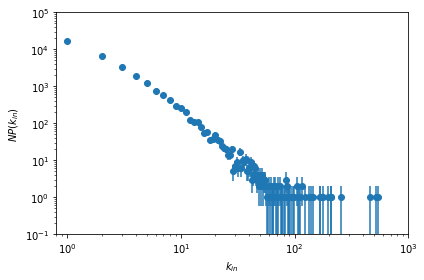

In [19]:
in_hist=vertex_hist(g,"in")
y=in_hist[0]
err = sqrt(in_hist[0])
err[err>=y]=y[err>=y]-1e-2

figure(figsize=(6,4))
errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="in")
gca().set_yscale("log")
gca().set_xscale("log")
gca().set_ylim(1e-1, 1e5)
gca().set_xlim(0.8, 1e3)
subplots_adjust(left=0.2, bottom=0.2)
xlabel("$k_{in}$")
ylabel("$NP(k_{in})$")
tight_layout()
savefig("price-deg-dist.pdf")
savefig("price-deg-dist.svg")


In [3]:
from graph_tool.all import *
import matplotlib
g=load_graph("price.xml.gz")
age=g.vertex_properties["age"]

pos=sfdp_layout(g)
graph_draw(g, pos, output_size=(100, 100), vertex_color=[1,1,1,0],
           vertex_fill_color=age, vertex_size=1, edge_pen_width=1.2,
           vcmap=matplotlib.cm.gist_heat_r,output="price.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f38c1d1d3c0, at 0x7f39841fc7c0>